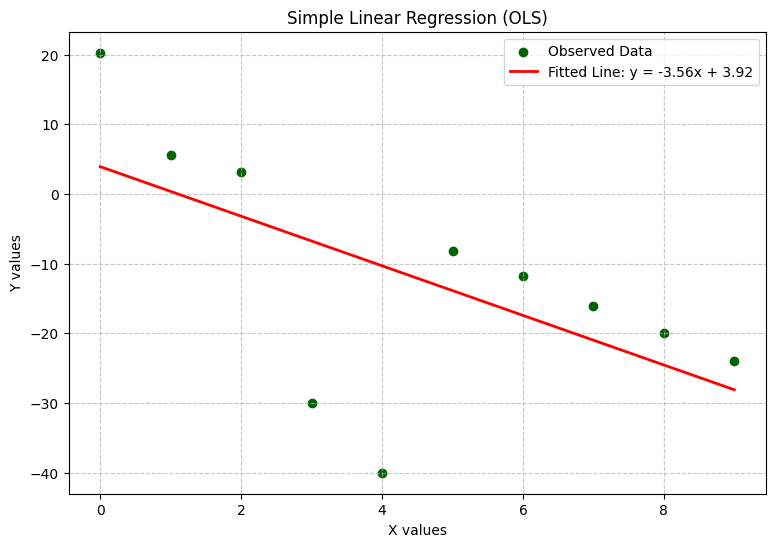

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
x_vals = np.arange(10)   # same as [0,1,...,9]
y_vals = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Build design matrix (bias term + feature)
A = np.column_stack((np.ones(len(x_vals)), x_vals))
b = y_vals.reshape(-1, 1)

# Compute regression parameters using Normal Equation
theta = np.linalg.inv(A.T @ A) @ A.T @ b

b0, b1 = theta.flatten()   # intercept & slope

# Generate line for plotting
x_fit = np.linspace(x_vals.min(), x_vals.max(), 200)
y_fit = b0 + b1 * x_fit

# Plotting
plt.figure(figsize=(9, 6))
plt.scatter(x_vals, y_vals, c='darkgreen', marker='o', label="Observed Data")
plt.plot(x_fit, y_fit, color='red', linewidth=2, label=f"Fitted Line: y = {b1:.2f}x + {b0:.2f}")  # solid line
plt.title("Simple Linear Regression (OLS)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


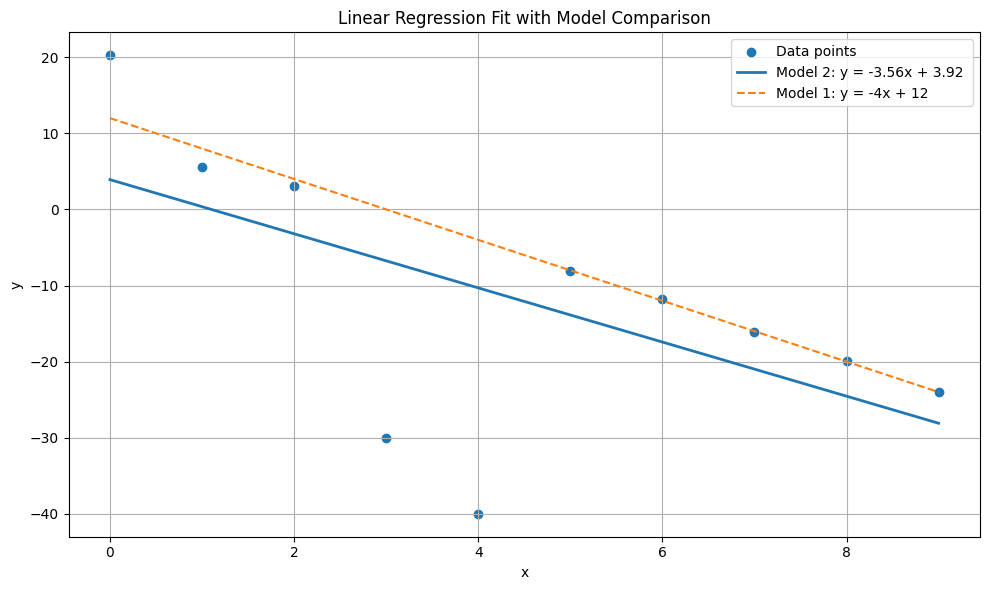

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dataset
xs = np.arange(10)  # 0..9
ys = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])


# polyfit returns [slope, intercept] for degree=1
slope_hat, intercept_hat = np.polyfit(xs, ys, 1)

# Line for the fitted regression
x_line = np.linspace(xs.min(), xs.max(), 200)
y_line = intercept_hat + slope_hat * x_line  # solid regression line

# --- Reference model y = -4x + 12 (renamed, slightly different style) ---
def ref_model(x):
    return -4 * x + 12

x_ref = np.linspace(xs.min(), xs.max(), 200)
y_ref = ref_model(x_ref)  # dashed model line

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, label='Data points')  # points
plt.plot(x_line, y_line, linewidth=2, label=f'Model 2: y = {slope_hat:.2f}x + {intercept_hat:.2f} ')  # solid
plt.plot(x_ref, y_ref, linestyle='--', label='Model 1: y = -4x + 12')  # dashed
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit with Model Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()


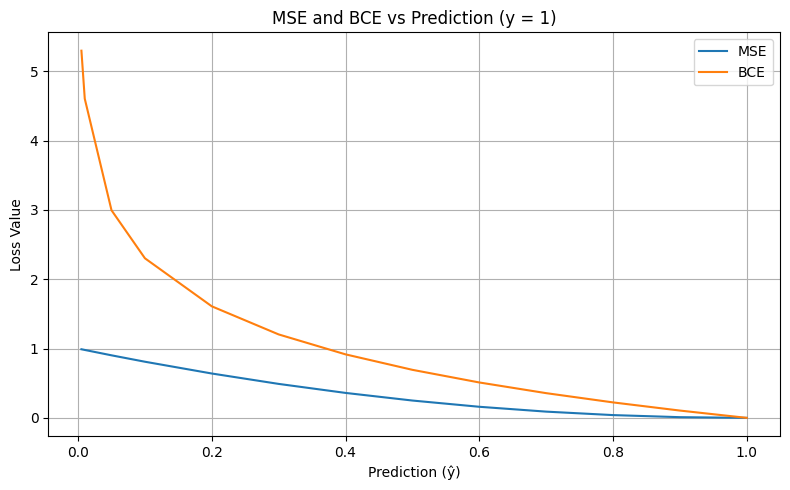

In [12]:
import math
import matplotlib.pyplot as plt

# True label
y_true = 1

# Predictions
y_pred = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Loss functions
def calculate_mse(y_true, y_hat):
    return (y_true - y_hat) ** 2

def calculate_bce(y_true, y_hat):
    # Binary cross-entropy for y_true ∈ {0,1}
    epsilon = 1e-15
    p = max(min(y_hat, 1 - epsilon), epsilon)  # clip to avoid log(0)
    return -(y_true * math.log(p) + (1 - y_true) * math.log(1 - p))

# Compute losses
mse_values = [calculate_mse(y_true, p) for p in y_pred]
bce_values = [calculate_bce(y_true, p) for p in y_pred]

# One chart with both curves
plt.figure(figsize=(8, 5))
plt.plot(y_pred, mse_values, label='MSE')
plt.plot(y_pred, bce_values, label='BCE')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('MSE and BCE vs Prediction (y = 1)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


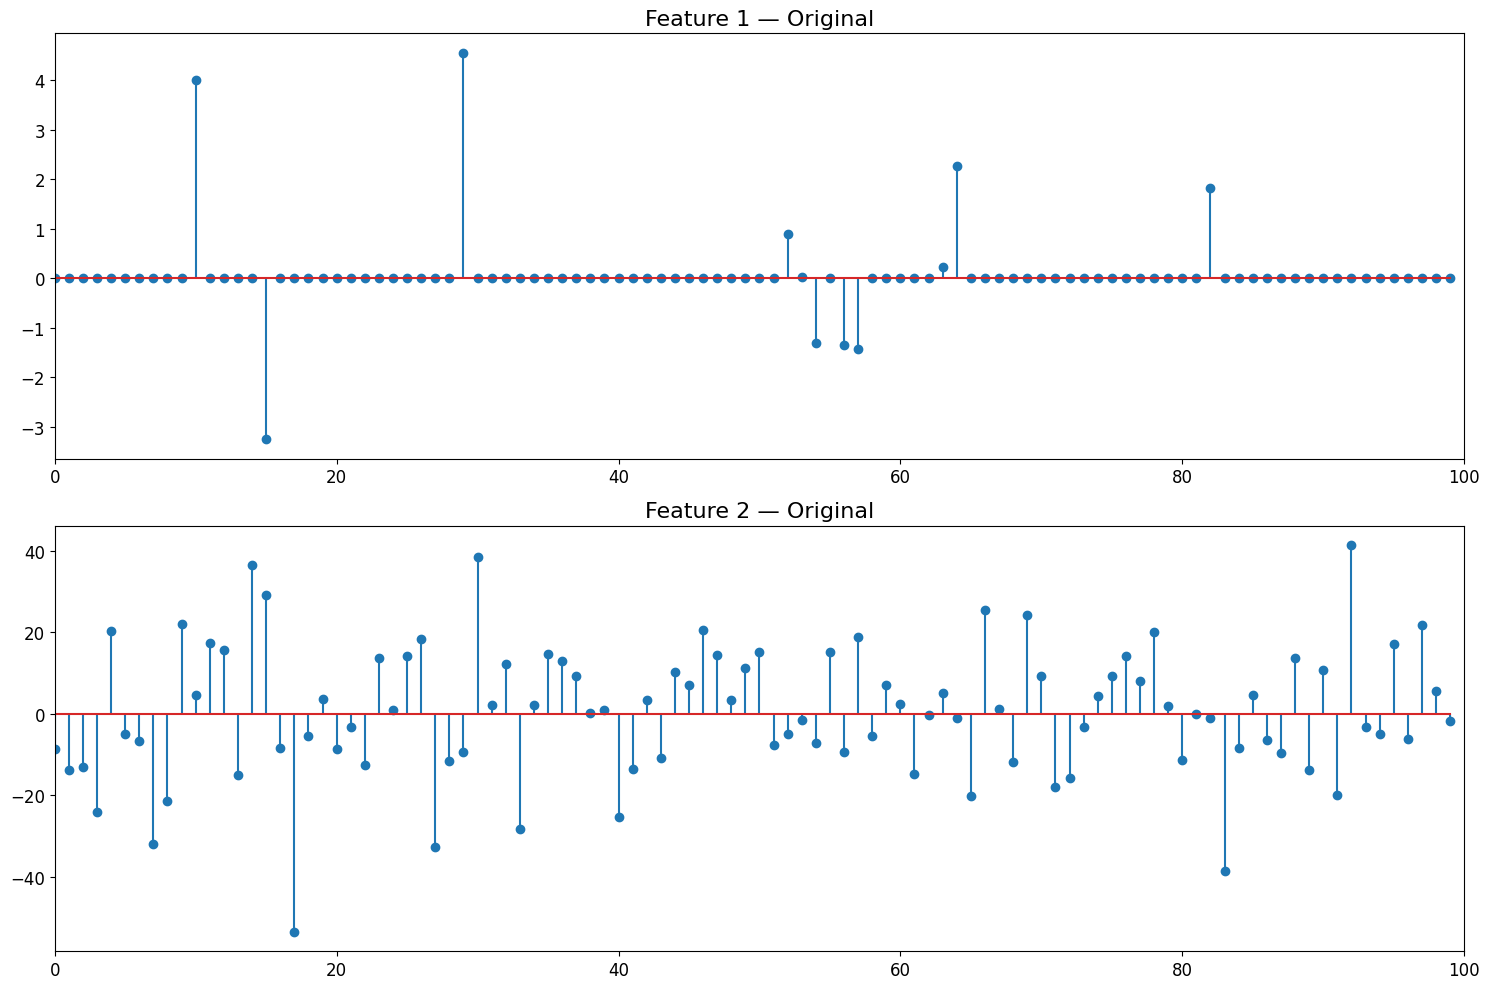

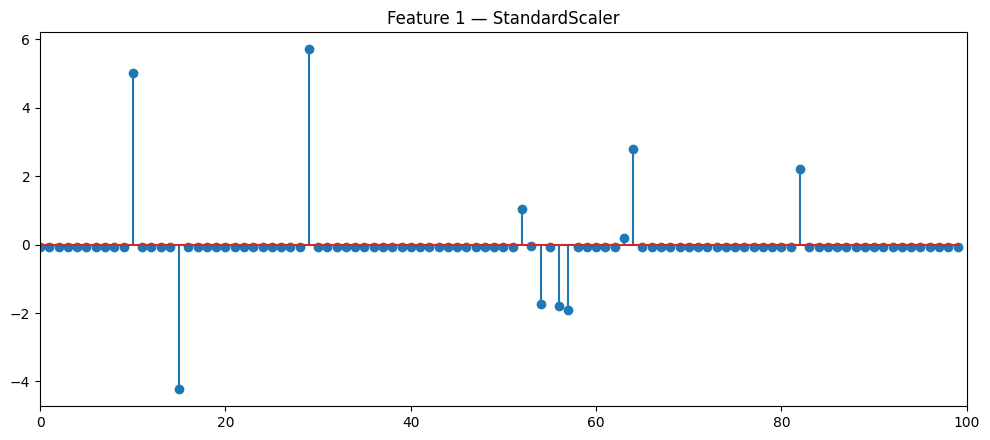

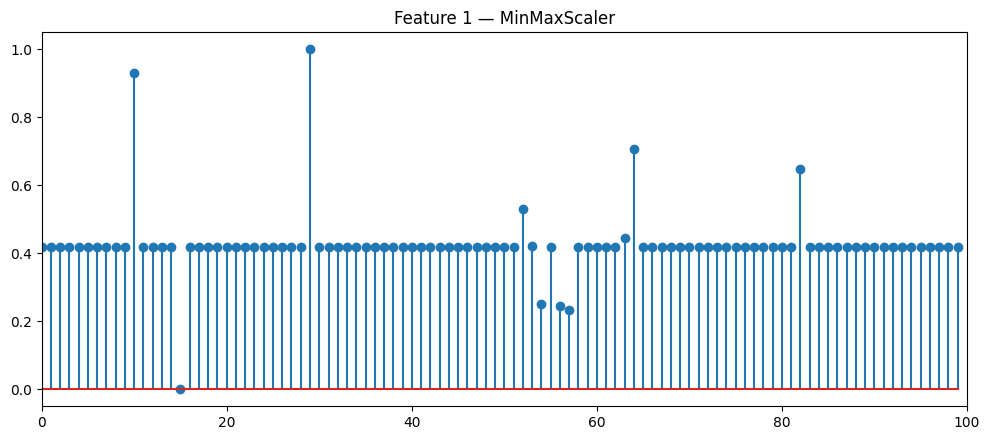

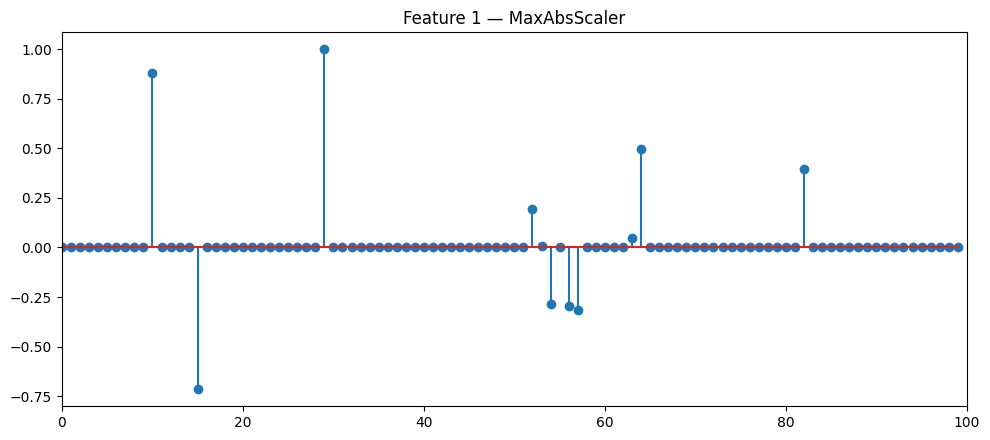

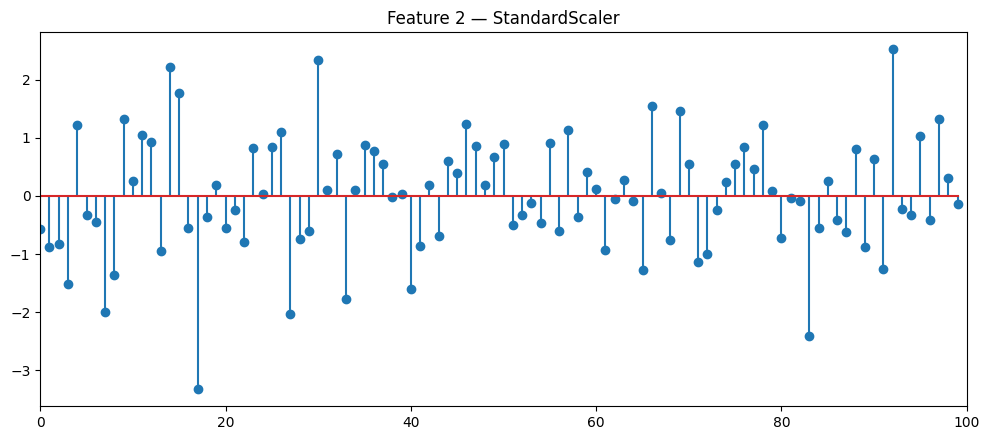

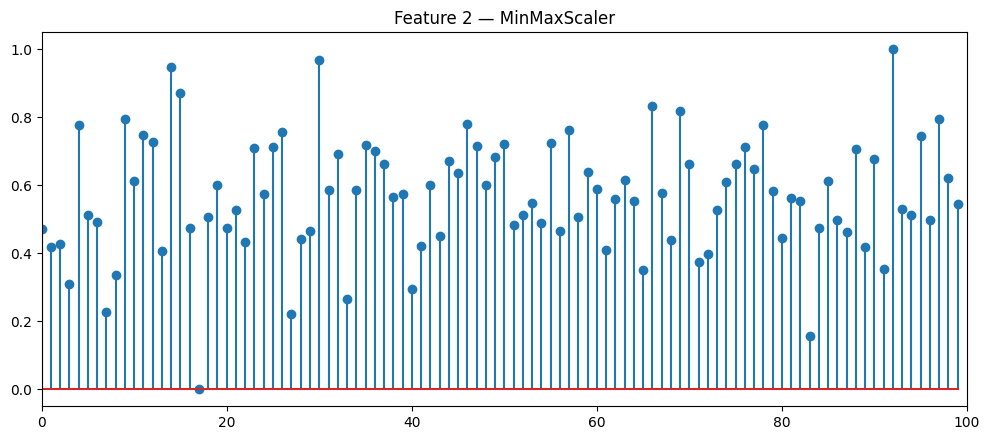

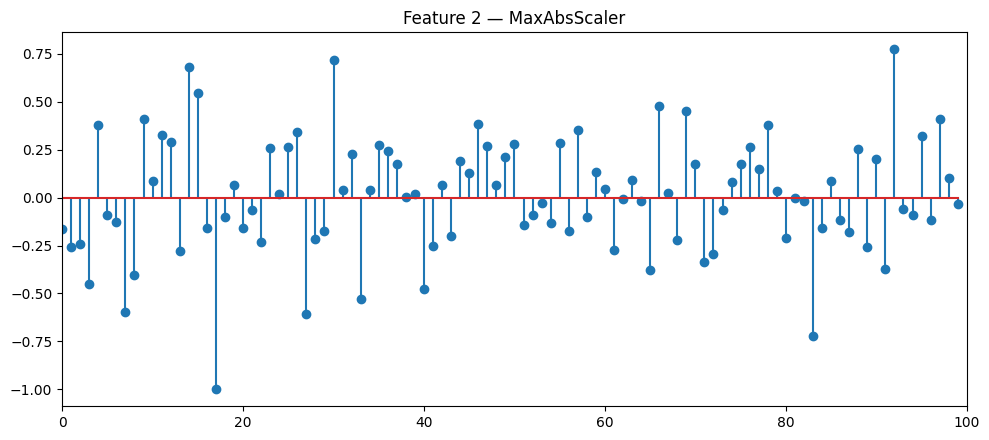

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


# 1) Signal generation

def generate_signal(signal_length, num_nonzero):
    """
    Create a sparse signal array with a limited number of non-zero entries.
    """
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100       # Total length of the signal
num_nonzero = 10          # Number of non-zero elements
your_index_no = 220535    # <- change to your index

# Generate Feature 1 (sparse signal)
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5.0

# Generate Feature 2 (Gaussian noise)
epsilon = np.random.normal(0, 15, signal_length)


# 2) Show originals

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 — Original", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 — Original", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.stem(epsilon)

plt.tight_layout()
plt.show()

# 3) Apply scalers

def fit_transform_1d(scaler, x):
    return scaler.fit_transform(x.reshape(-1, 1)).ravel()

# Feature 1
F1_std    = fit_transform_1d(StandardScaler(), sparse_signal)
F1_minmax = fit_transform_1d(MinMaxScaler((0, 1)), sparse_signal)
F1_maxabs = fit_transform_1d(MaxAbsScaler(), sparse_signal)

# Feature 2
F2_std    = fit_transform_1d(StandardScaler(), epsilon)
F2_minmax = fit_transform_1d(MinMaxScaler((0, 1)), epsilon)
F2_maxabs = fit_transform_1d(MaxAbsScaler(), epsilon)


# 4) Plotting three plots per feature


# --- Feature 1 ---
plt.figure(figsize=(10, 4.5))
plt.title("Feature 1 — StandardScaler")
plt.xlim(0, signal_length)
plt.stem(F1_std)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4.5))
plt.title("Feature 1 — MinMaxScaler")
plt.xlim(0, signal_length)
plt.stem(F1_minmax)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4.5))
plt.title("Feature 1 — MaxAbsScaler")
plt.xlim(0, signal_length)
plt.stem(F1_maxabs)
plt.tight_layout()
plt.show()

# --- Feature 2 ---
plt.figure(figsize=(10, 4.5))
plt.title("Feature 2 — StandardScaler")
plt.xlim(0, signal_length)
plt.stem(F2_std)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4.5))
plt.title("Feature 2 — MinMaxScaler")
plt.xlim(0, signal_length)
plt.stem(F2_minmax)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4.5))
plt.title("Feature 2 — MaxAbsScaler")
plt.xlim(0, signal_length)
plt.stem(F2_maxabs)
plt.tight_layout()
plt.show()
